This is a Jupyter Notebook file (`.ipynb` extension) that contains Python code and markdown cells for neural network exercises. 

The file appears to contain multiple exercises, but there are two main datasets being used:

1. The first dataset is a synthetic/generated dataset used in Exercise 1, which creates a 2D classification problem with 4 classes (labeled 0,1,2,3). The data points form four spiral-like patterns in a 2D plane, with each class represented by a different color (red, green, blue, and black). This is created using numpy's random number generation and trigonometric functions.

2. The second dataset appears to be car pricing data from a file named 'ex6_data.csv' which contains:
   - Features about cars including both numeric and categorical columns
   - A target variable 'MSRP' (Manufacturer's Suggested Retail Price)
   - The data is filtered to include only car models with at least 10 representatives and MSRP <= $100,000

The notebook includes code for:
- Data visualization using matplotlib
- Data preprocessing using scikit-learn
- Neural network implementation using TensorFlow/Keras
- Model evaluation and performance visualization

The file structure shows it's a teaching/learning resource focused on neural network implementation and practical machine learning exercises.


In [1]:
pip install pandas

  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **EXERCISE 1.**

Build and train a neural network that achieves 99.5 % classification accuracy for datapoints $x^{(i)}=[x_1^{(i)},x_2^{(i)}],\,y^{(i)}=0,1,2,3$, below.

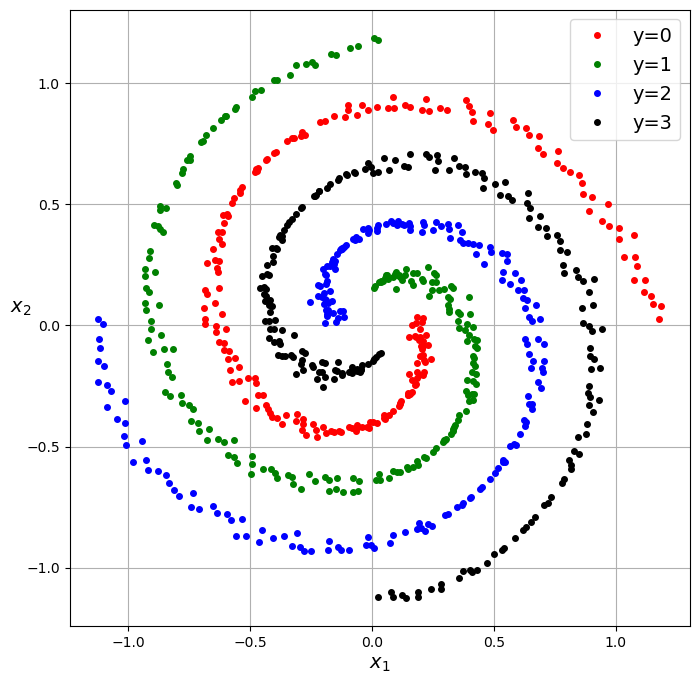

In [2]:
np.random.seed(0)
n=200
m=4*n #number of datapoints
th=np.linspace(0,2*np.pi,n)
r=0.15+np.linspace(0,1,n)
e=0.02*np.random.randn(n)

x11=r*np.cos(-th)+e
x12=r*np.sin(-th)+e

x21=r*np.cos(np.pi/2-th)+e
x22=r*np.sin(np.pi/2-th)+e

x31=r*np.cos(np.pi-th)+e
x32=r*np.sin(np.pi-th)+e

x41=r*np.cos(3*np.pi/2-th)+e
x42=r*np.sin(3*np.pi/2-th)+e


plt.figure(figsize=(8,8))
plt.plot(x11,x12,'r.',markersize=8,label='y=0')
plt.plot(x21,x22,'g.',markersize=8,label='y=1')
plt.plot(x31,x32,'b.',markersize=8,label='y=2')
plt.plot(x41,x42,'k.',markersize=8,label='y=3')
plt.grid()
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.legend(fontsize=14)
plt.show()

Calculate the confusion matrix

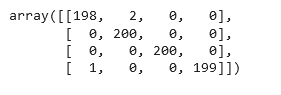

and draw a picture like below of the resulting classification

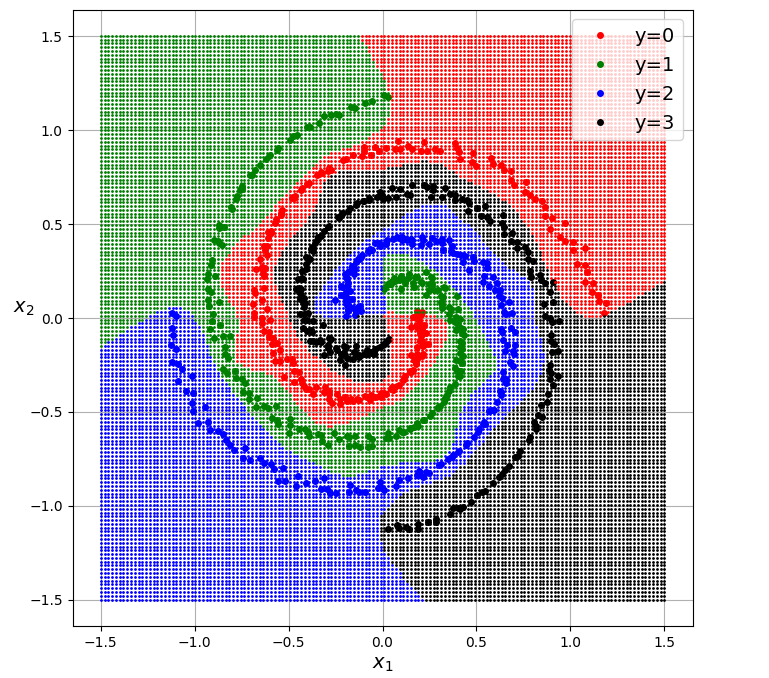

In [1]:
pip install distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 1.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


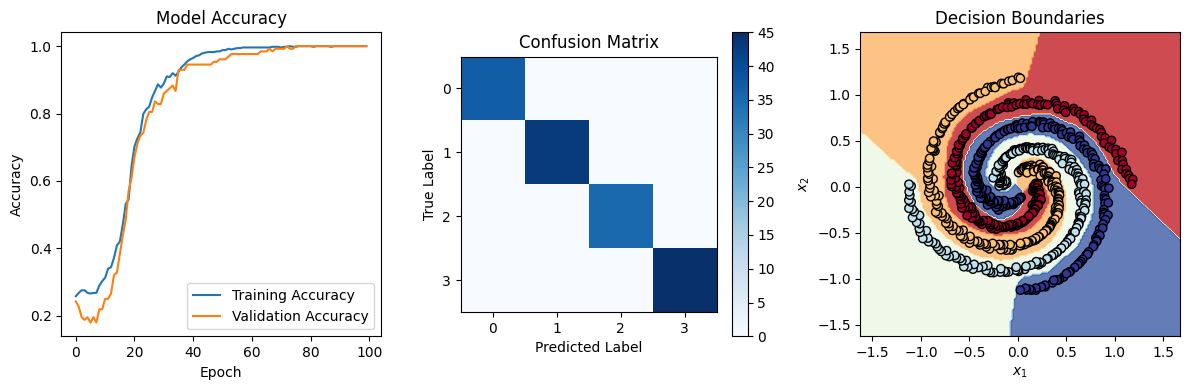

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate data
np.random.seed(0)
n = 200
m = 4*n  # number of datapoints
th = np.linspace(0, 2*np.pi, n)
r = 0.15 + np.linspace(0, 1, n)
e = 0.02 * np.random.randn(n)

x11 = r*np.cos(-th) + e
x12 = r*np.sin(-th) + e
x21 = r*np.cos(np.pi/2-th) + e
x22 = r*np.sin(np.pi/2-th) + e
x31 = r*np.cos(np.pi-th) + e
x32 = r*np.sin(np.pi-th) + e
x41 = r*np.cos(3*np.pi/2-th) + e
x42 = r*np.sin(3*np.pi/2-th) + e

# Combine data
X = np.vstack((np.column_stack((x11, x12)),
               np.column_stack((x21, x22)),
               np.column_stack((x31, x32)),
               np.column_stack((x41, x42))))

y = np.concatenate((np.zeros(n), np.ones(n), 2*np.ones(n), 3*np.ones(n)))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Predict on test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot results
plt.figure(figsize=(12, 4))

# Plot training history
plt.subplot(131)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot confusion matrix
plt.subplot(132)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['0', '1', '2', '3'])
plt.yticks(tick_marks, ['0', '1', '2', '3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot decision boundaries
plt.subplot(133)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.title('Decision Boundaries')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 200
m = 4 * n  # number of datapoints
th = np.linspace(0, 2 * np.pi, n)
r = 0.15 + np.linspace(0, 1, n)
e = 0.02 * np.random.randn(n)

# Generating points for each class
x11 = r * np.cos(-th) + e
x12 = r * np.sin(-th) + e
x21 = r * np.cos(np.pi/2 - th) + e
x22 = r * np.sin(np.pi/2 - th) + e
x31 = r * np.cos(np.pi - th) + e
x32 = r * np.sin(np.pi - th) + e
x41 = r * np.cos(3 * np.pi/2 - th) + e
x42 = r * np.sin(3 * np.pi/2 - th) + e

# Assembling the dataset
X = np.vstack((np.column_stack((x11, x12)),
               np.column_stack((x21, x22)),
               np.column_stack((x31, x32)),
               np.column_stack((x41, x42))))
y = np.array([0] * n + [1] * n + [2] * n + [3] * n)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Neural network architecture
model = Sequential([
    Dense(100, activation='relu', input_dim=2),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)

# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Accuracy: {accuracy:.4f}')



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0089 
Accuracy: 1.0000


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[37  0  0  0]
 [ 0 43  0  0]
 [ 0  0 35  0]
 [ 0  0  0 45]]
13633/13633 ━━━━━━━━━━━━━━━━━━━━ 3s 215us/step


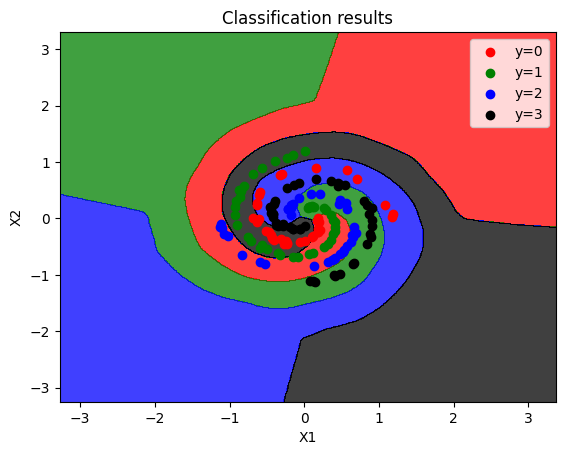

In [28]:
# Predicting the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plotting the decision boundary
from matplotlib.colors import ListedColormap

xx1, xx2 = np.meshgrid(np.arange(start=X_test_scaled[:, 0].min() - 1, stop=X_test_scaled[:, 0].max() + 1, step=0.01),
                       np.arange(start=X_test_scaled[:, 1].min() - 1, stop=X_test_scaled[:, 1].max() + 1, step=0.01))

Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue', 'black')))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for i, cl in zip(range(4), ("r", "g", "b", "k")):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], c=cl, label=f'y={i}')
plt.title('Classification results')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


31250/31250 ━━━━━━━━━━━━━━━━━━━━ 6s 204us/step


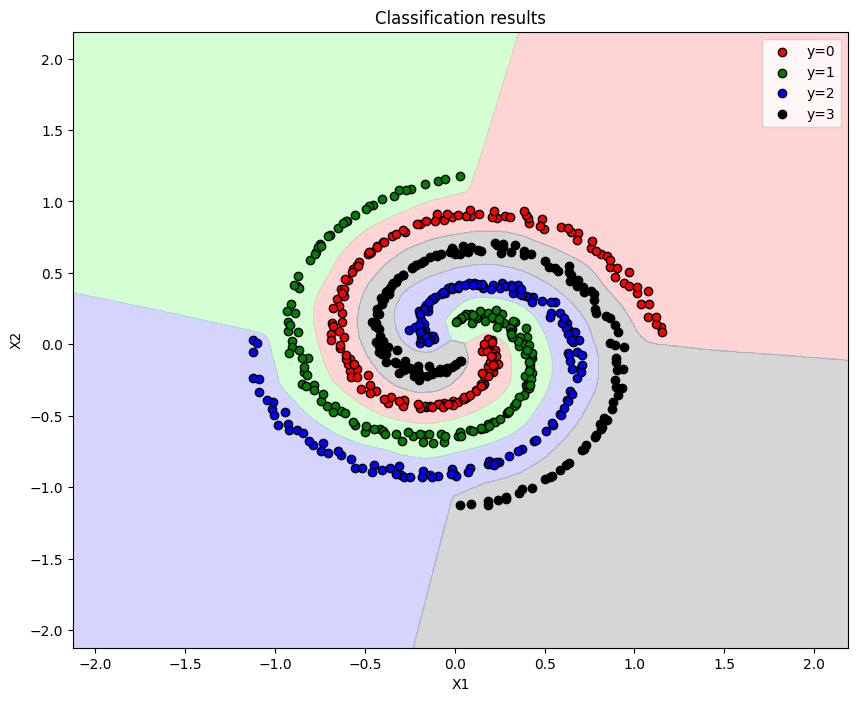

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming the scaler and model are already defined and fitted as per previous code

# Define the meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Predict classes for each point in the meshgrid
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Define the color map
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF']) # Red, Green, Blue, Gray for classes 0, 1, 2, 3
cmap_points = ['red', 'green', 'blue', 'black']

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_background)

# Plot the training points
for idx, color in enumerate(cmap_points):
    plt.scatter(X_train[y_train == idx, 0], X_train[y_train == idx, 1], c=color, label=f'y={idx}', edgecolors='k')

plt.title('Classification results')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


##**EXERCISE 2**

In [26]:
pip instsll seaborn

ERROR: unknown command "instsll" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [8]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [4]:
#load apple_quality.csv to colab
df=pd.read_csv('apple_quality.csv',index_col=0)
df.head() #first 5 rows


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


Goal: to predict Quality using the other 7 variables Size ... Acidity

Split datapoints to training and test (70%/30%), and build and train a neural network that achieves 93% classification accuracy for test data, and calculate the confusion matrix.

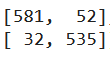

Classify the apple
xt=[ 1.34470668, -0.08934453, -4.50875321,  0.59093255, -3.98352604,
        1.50052136, -0.28032534]

(ans. bad)        

## **EXERCISE 3**

In [14]:
#load Dry_Bean_Dataset.csv to colab
df=pd.read_csv('Dry_Bean_Dataset.csv')
df.shape

(13611, 17)

In [11]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Goal: to predict the class using the other variables.


In [30]:

# Display the first few rows of the dataset
print(df.head())

# Separate features and target
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Convert the target to numerical values
y = pd.factorize(y)[0]

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

# Predict the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classify the given input vector
xt = np.array([[29817, 654.94, 249.939378, 153.5127658, 1.62813417, 0.78915041, 30306, 194.8439979, 0.76110374, 0.98386458, 0.87351583, 0.77956502, 0.00838245, 0.00190968, 0.60772162, 0.98945234]])
xt_scaled = scaler.transform(xt)
prediction = model.predict(xt_scaled)
predicted_class = np.argmax(prediction, axis=-1)
class_names = df['Class'].unique()

print(f'The predicted class for the input vector is: {class_names[predicted_class][0]}')


  Make     Model  Year             Engine Fuel Type  Engine HP  \
1  BMW  1 Series  2011  premium unleaded (required)      300.0   
2  BMW  1 Series  2011  premium unleaded (required)      300.0   
3  BMW  1 Series  2011  premium unleaded (required)      230.0   
4  BMW  1 Series  2011  premium unleaded (required)      230.0   
5  BMW  1 Series  2012  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   
5               6.0            MANUAL  rear wheel drive              2.0   

           Market Category Vehicle Size Vehicle Style  highway MPG  city mpg  \
1       Luxury,Performance      Compact   Convertible           28

KeyError: "['Class'] not found in axis"

Split datapoints to training and test (70%/30%), and build and train a neural network that achieves 93% classification accuracy for test data, and calculate the confusion matrix.

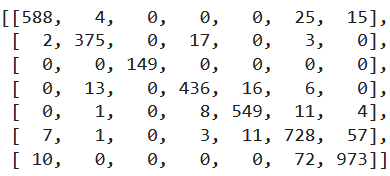

Classify the dry bean

xt=[29817        ,   654.94      ,   249.9393798 ,   153.5127658 ,
           1.62813417,     0.78915041, 30306        ,   194.8439979 ,
           0.76110374,     0.98386458,     0.87351583,     0.77956502,
           0.00838245,     0.00190968,     0.60772162,     0.98945234]

(ans. dermason)           

## **EXERCISE 4**



[Reuters newswire classification dataset](https://keras.io/api/datasets/reuters/)


This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.

['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

Each newswire is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.



Build and train a neural network that achieves 80% classification accuracy for test data

In [ ]:
from tensorflow import keras

In [ ]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1 # The start of a sequence will be marked with this character.
oov_char = 2 #the out-of-vocabulary character. Words that were cut out because of the num_words will be replaced with this character.
index_from = 3 #Index actual words with this index and higher.

num_words=1000 #number of used words
#words with index >=1000 are replaced by oov_char

(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from, num_words=num_words)

#x_train, x_test: lists of 8982,2246 sequences, which are lists of indexes (integers).
#If the num_words argument was specific, the maximum possible index value is num_words - 1

#y_train, y_test: lists of integer labels (0,1,...,45)


In [ ]:
print(len(x_train))
print(len(x_test))

8982
2246


In [ ]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
len(x_train[0])

87

In [ ]:
y_train[0]

3

In [ ]:
print(min(y_train))
print(max(y_train))

0
45


In [ ]:
print(min(len(x_train[k]) for k in range(8982)))
print(max(len(x_train[k]) for k in range(8982)))

13
2376


In [ ]:
max(max(x_train))

990

In [ ]:
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.reuters.get_word_index()

In [ ]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [ ]:
# list out keys and values separately
words = list(word_index.keys())
indices = list(word_index.values())
print(words[0:10]) #10 first words
print(indices[0:10]) #10 first indices

#10 most common words
for k in range(10):
  ind=indices.index(k+1)
  print(words[ind])

['mdbl', 'fawc', 'degussa', 'woods', 'hanging', 'localized', 'sation', 'chanthaburi', 'refunding', 'hermann']
[10996, 16260, 12089, 8803, 13796, 20672, 20673, 20675, 10997, 8804]
the
of
to
in
said
and
a
mln
3
for


In [ ]:
# Reverse the word index to obtain a dict mapping indices to words
# And add index_from to indices to sync with x_train, x_test
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update inverted_word_index to include start_char and oov_char
inverted_word_index[start_char] = "[start]"
inverted_word_index[oov_char] = "[oov]"


In [ ]:
inverted_word_index

{10999: 'mdbl',
 16263: 'fawc',
 12092: 'degussa',
 8806: 'woods',
 13799: 'hanging',
 20675: 'localized',
 20676: 'sation',
 20678: 'chanthaburi',
 11000: 'refunding',
 8807: 'hermann',
 20679: 'passsengers',
 20680: 'stipulate',
 8355: 'heublein',
 20716: 'screaming',
 16264: 'tcby',
 188: 'four',
 1645: 'grains',
 20683: 'broiler',
 12093: 'wooden',
 1223: 'wednesday',
 13800: 'highveld',
 7596: 'duffour',
 20684: '0053',
 3917: 'elections',
 2566: '270',
 3554: '271',
 5116: '272',
 3555: '273',
 3403: '274',
 7978: 'rudman',
 3404: '276',
 3481: '277',
 3635: '278',
 4312: '279',
 9384: 'dormancy',
 7250: 'errors',
 3089: 'deferred',
 20686: 'sptnd',
 8808: 'cooking',
 20687: 'stratabit',
 16265: 'designing',
 20688: 'metalurgicos',
 13801: 'databank',
 20689: '300er',
 20690: 'shocks',
 7975: 'nawg',
 20691: 'tnta',
 20692: 'perforations',
 2894: 'affiliates',
 20693: '27p',
 16266: 'ching',
 598: 'china',
 16267: 'wagyu',
 3192: 'affiliated',
 16268: 'chino',
 16269: 'chinh',
 2

In [ ]:
print(inverted_word_index[1])
print(inverted_word_index[2])
for k in range(4,14):
  print(inverted_word_index[k])


[start]
[oov]
the
of
to
in
said
and
a
mln
3
for


In [ ]:
# Decode review k in the train dataset
k=0
decoded_review = ' '.join(inverted_word_index[i] for i in x_train[k])

decoded_review

'[start] [oov] [oov] said as a result of its december acquisition of [oov] co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and [oov] [oov] revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash [oov] per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
y_train[k]

3

In [ ]:
#One-hot encode your lists to turn them into vectors of 0s and 1s.
#This means, for instance, turning the sequence [3, 5] into a vector of length num_words
#that would be all 0s except for indices 3 and 5, which would be 1s
mtrain=len(x_train)
Xtrain=np.zeros((mtrain,num_words))
for k in range(mtrain):
  Xtrain[k,x_train[k]]=1

mtest=len(x_test)
Xtest=np.zeros((mtest,num_words))
for k in range(mtest):
  Xtest[k,x_test[k]]=1

In [ ]:
Xtrain[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
Xtrain.shape

(8982, 1000)

In [ ]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
#You should also vectorize your labels, which is straightforward
ytrain = np.array(y_train).astype('float32')
ytest = np.array(y_test).astype('float32')


In [ ]:
ytrain

array([ 3.,  4.,  3., ..., 25.,  3., 25.], dtype=float32)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

# Load the Reuters dataset
num_words = 10000  # Consider only the top 10,000 words
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=num_words)

# Vectorize the data
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

# One-hot encode the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_words,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **EXERCISE 5**

[Sign-language-mnist-dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code)

 28x28 bw-pictures of hand-gesture alphabets  A-Y (without J),
27455 training- and 7172 test.



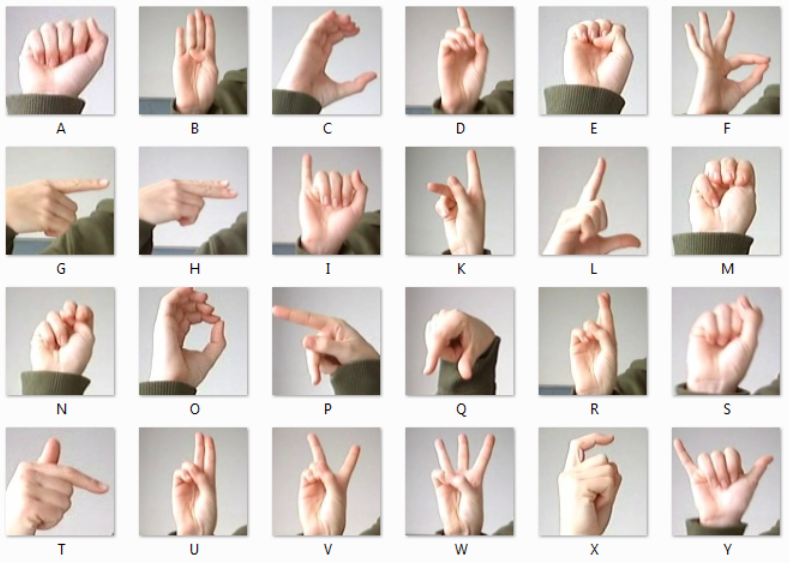







Build and train a neural network that achieves 80% classification accuracy for test-data.

Calculate the predictions for a random test-picture and draw a picture like below
(todennäköisyys = probability).




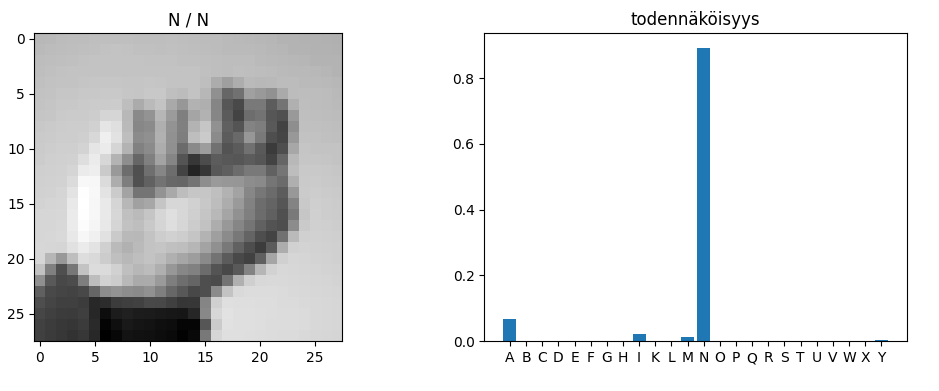

In [1]:
#load sign_mnist_train.zip to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#unzip to colab
!unzip '/content/drive/MyDrive/sign_mnist.zip' -d '/content'

Archive:  /content/drive/MyDrive/sign_mnist.zip
   creating: /content/sign_mnist/
  inflating: /content/sign_mnist/sign_mnist_test.csv  
  inflating: /content/sign_mnist/sign_mnist_train.csv  


In [5]:
#read to np.array
train_data=np.loadtxt('sign_mnist/sign_mnist_train.csv',delimiter=',',skiprows=1)
test_data=np.loadtxt('sign_mnist/sign_mnist_test.csv',delimiter=',',skiprows=1)

In [6]:
print(train_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


In [7]:
xtrain=train_data[:,1:]/255.0 #pixel values to 0...1
ytrain=train_data[:,0] #classes
xtest=test_data[:,1:]/255.0
ytest=test_data[:,0]

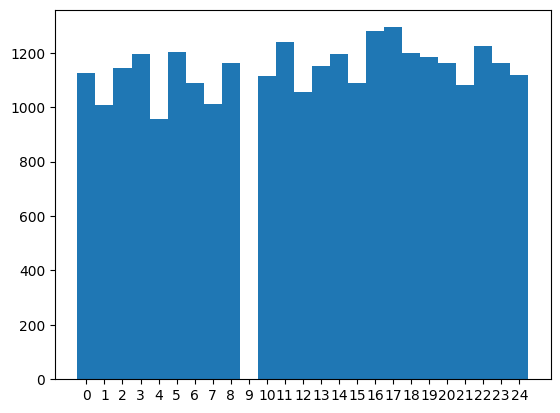

In [8]:
#distribution of classes
plt.hist(ytrain,bins=np.arange(-0.5,25.5,1))
plt.xticks(np.arange(0,25,1))
plt.show()

In [9]:
#class y=9 is missing (corresponds to J))
#decrease classes 10-24 by one
ytrain[ytrain>9]=ytrain[ytrain>9]-1
ytest[ytest>9]=ytest[ytest>9]-1

Y=['A','B','C','D','E','F','G','H','I','K','L','M',
   'N','O','P','Q','R','S','T','U','V','W','X','Y']

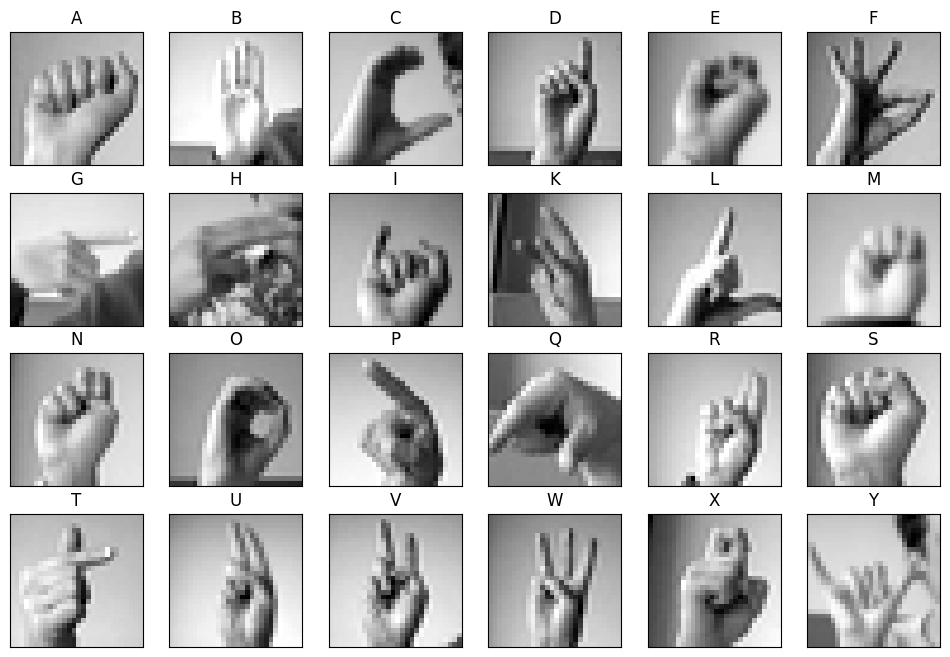

In [10]:
#example pictures
plt.figure(figsize=(12,8))
for k in range(24):
    xtraink=xtrain[ytrain==k,:]
    mk,nk=xtraink.shape
    indk=np.random.randint(mk)
    kuvak=xtraink[indk,:].reshape((28,28))
    plt.subplot(4,6,k+1)
    plt.imshow(kuvak, cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title(Y[k])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1575 - loss: 2.7752 - val_accuracy: 0.7061 - val_loss: 0.9366
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5913 - loss: 1.1954 - val_accuracy: 0.8946 - val_loss: 0.3716
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7426 - loss: 0.7402 - val_accuracy: 0.9581 - val_loss: 0.1775
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8171 - loss: 0.5194 - val_accuracy: 0.9738 - val_loss: 0.1202
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8521 - loss: 0.4053 - val_accuracy: 0.9903 - val_loss: 0.0707
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8912 - loss: 0.3065 - val_accuracy: 0.9940 - val_loss: 0.0416
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9102 - loss: 0.2545 - val_accuracy: 0.9967 - val_loss: 0.0319
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9175 - loss: 0.2262 - val_accu

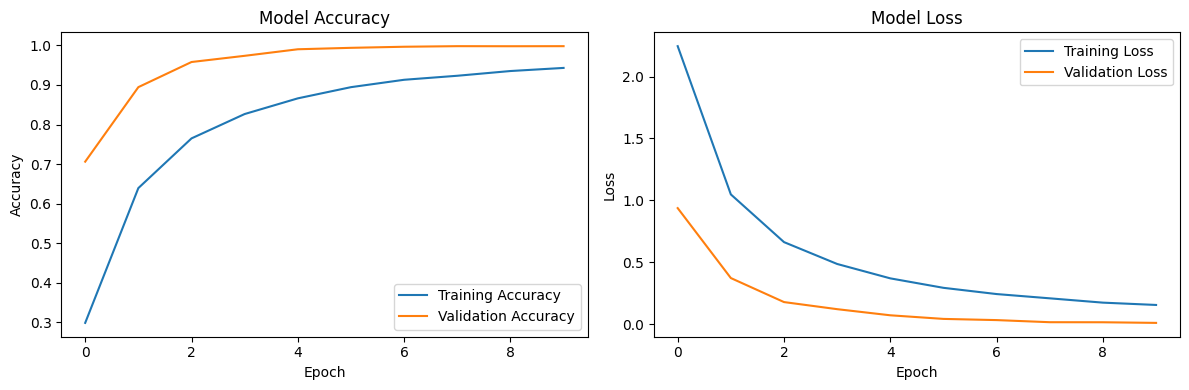

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (25,) and arg 1 with shape (24,).

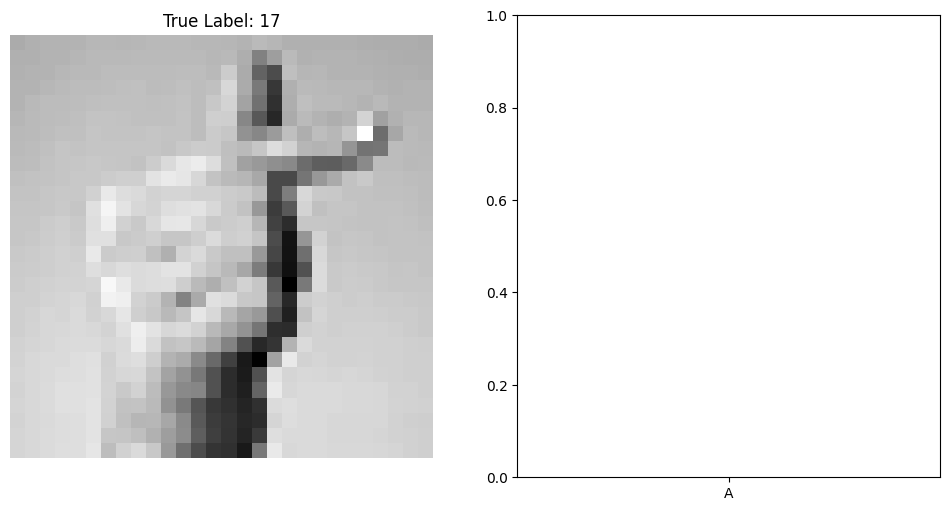

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
train_data = pd.read_csv('sign_mnist/sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist/sign_mnist_test.csv')

# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Adjust labels (remove 'J' which is label 9)
y_train = y_train - 1
y_train[y_train >= 9] -= 1
y_test = y_test - 1
y_test[y_test >= 9] -= 1

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=24)
y_test = to_categorical(y_test, num_classes=24)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to predict and visualize a random test image
def predict_and_visualize():
    # Select a random test image
    index = np.random.randint(0, X_test.shape[0])
    image = X_test[index]
    true_label = np.argmax(y_test[index])
    
    # Make prediction
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {true_label}")
    plt.axis('off')
    
    plt.subplot(122)
    labels = [chr(i + 65) for i in range(26) if i != 9]  # A-Z excluding J
    plt.bar(labels, prediction[0])
    plt.title(f"Predicted Label: {predicted_label}")
    plt.xlabel('Sign')
    plt.ylabel('Probability')
    
    plt.tight_layout()
    plt.show()

# Predict and visualize a random test image
predict_and_visualize()

## **EXERCISE 6**

Use Models that have at least 10 representatives and datapoints whose MSRP  $\le$ 100000.

Split datapoints to training and test (70%/30%),
and build and train a neural network to predict the value  $y$ = MSRP using the other variables such that test mae is $\le$ 2750.

Draw pictures like below

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

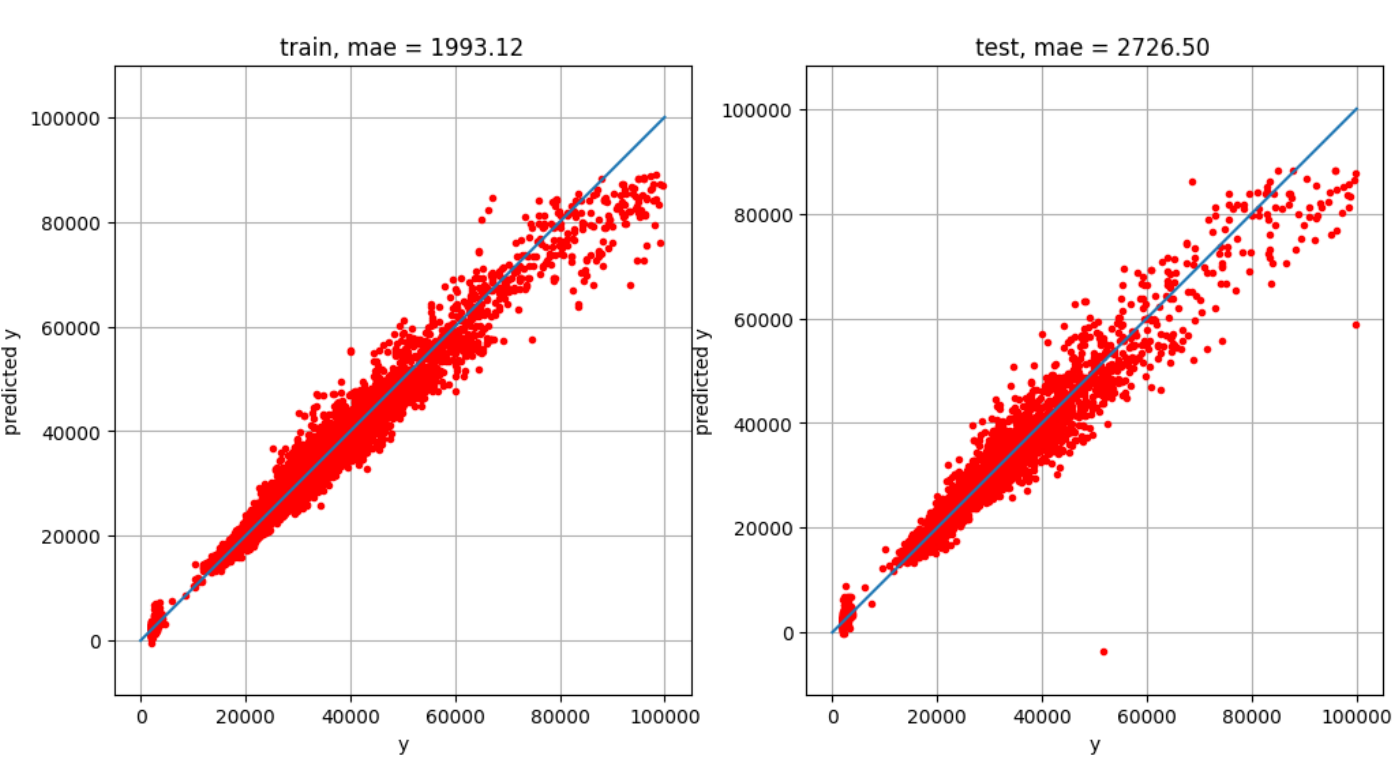

201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


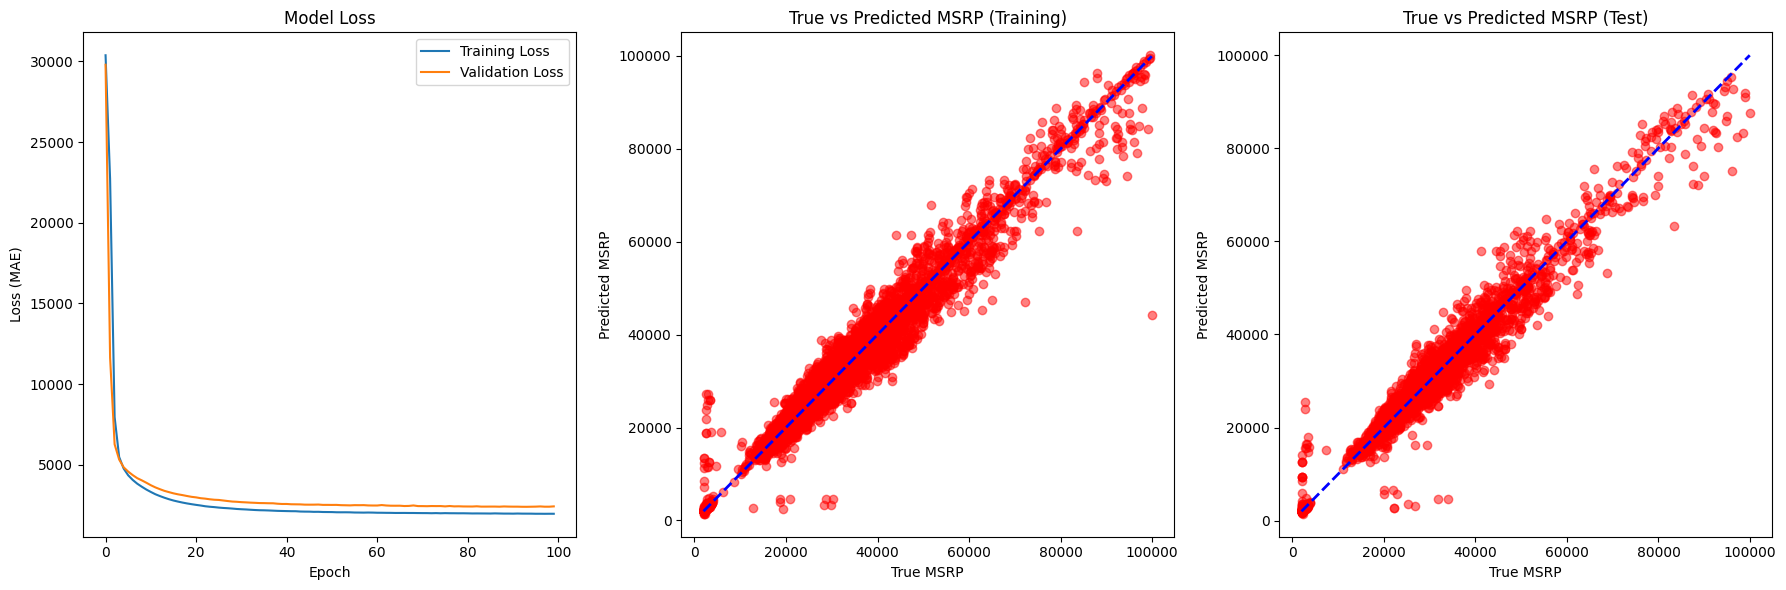

Train MAE: $2032.36
Test MAE: $2434.23


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

# Load the data
data = pd.read_csv('ex6_data.csv')

# Filter models with at least 10 representatives and MSRP <= 100000
model_counts = data['Model'].value_counts()
valid_models = model_counts[model_counts >= 10].index
filtered_data = data[data['Model'].isin(valid_models) & (data['MSRP'] <= 100000)]

# Prepare features (X) and target (y)
X = filtered_data.drop(['MSRP'], axis=1)
y = filtered_data['MSRP']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor with SimpleImputer to handle NaN values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Split the data into training and test sets (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with preprocessor and model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ]))
])

# Compile the model
model.named_steps['regressor'].compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')

# Fit the model
history = model.named_steps['regressor'].fit(
    preprocessor.fit_transform(X_train), y_train,
    epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

# Get predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot training history and predictions
plt.figure(figsize=(18, 6))

# Plot training history
plt.subplot(131)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()

# Plot true vs predicted values for training data
plt.subplot(132)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)
plt.xlabel('True MSRP')
plt.ylabel('Predicted MSRP')
plt.title('True vs Predicted MSRP (Training)')

# Plot true vs predicted values for test data
plt.subplot(133)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('True MSRP')
plt.ylabel('Predicted MSRP')
plt.title('True vs Predicted MSRP (Test)')

plt.tight_layout()
plt.show()

# Print MAE for both train and test sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Train MAE: ${train_mae:.2f}")
print(f"Test MAE: ${test_mae:.2f}")